# Representation of Categorical Variables

Description: 
The Ice Cream Data set was produced through an observational study in the United States between 18th of March 2018 and the 11th of July 2018. The data was collected every four weeks. There is an ice cream shop, that is operating in New York, LA and San Francisco. It have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.

Task: Order the data in a frequency distribution table.
      Create a bar chart, representing the data.
      Create a pie chart, representing the share of each city to the sales of your company.
      Create a pareto daigram, represent the cumulative frequency of the data.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 Frequency distribution table
 
 We take two lists, City and number of ice cream sold and put the respective data into Dataframe.

In [36]:
data = [['New York',12327],['LA',17129],['San Francisco',19923]]
df = pd.DataFrame(data,columns=['City','Sale'])
print (df)

            City   Sale
0       New York  12327
1             LA  17129
2  San Francisco  19923


Bar Chart

Bar graphs are good if you to want to present the data of different groups that are being compared with each other.

Code for the graph is given below:


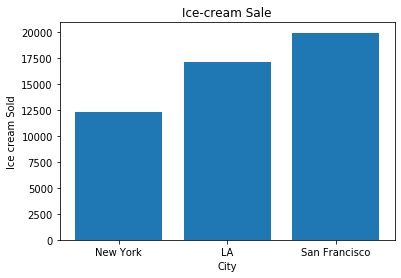

In [37]:
plt.bar(df["City"], df["Sale"])
plt.xlabel('City', fontsize=10)
plt.ylabel('Ice cream Sold', fontsize=10)
plt.title('Ice-cream Sale')
plt.show()

The graph tells that more ice cream is sell in San Francisco than LA and New York. 

Pie Chart

Pie charts are good to show proportional data of different categories and figures are usually in percentages here.

Let’s get into code

Firstly, We will calculate relative frequency. 

In [39]:
total_count = sum(df["Sale"])

In [40]:
total_count

49379

In [41]:
relative_feq =(df["Sale"]/total_count)* 100

In [42]:
df["Relative_Freq"] =relative_feq


Here is the frequency distribution with relative frequency

In [43]:
print(df)

            City   Sale  Relative_Freq
0       New York  12327      24.964054
1             LA  17129      34.688835
2  San Francisco  19923      40.347111


And it generates a chart like this:
startangle actually set the starting angle of pie. From center it calculates the angle and draw slices. autopct set how many decimals you want to show in % data. We have used one decimal here.    

Below pie chart is based on Sales.

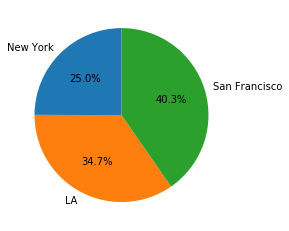

In [44]:
plt.pie(df["Sale"], labels=df["City"], startangle=90, autopct='%.1f%%')
plt.show()

And this chart is based on Relative_Freq

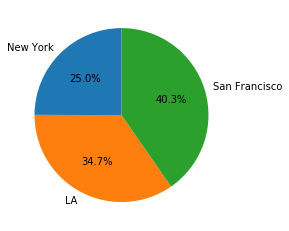

In [47]:
plt.pie(df["Relative_Freq"], labels=df["City"], startangle=90, autopct='%.1f%%')
plt.show()

In this way again it is very much clear that San Francisco branch sells the most of the icecream.
Both shows the same chart. So it is not nesscesary to calculate relative frequency.

Pareto Diagram

The Pareto diagram is a special type of bar chart where the categories are shown in descending order of frequency, and a separate curve shows the cumulative frequency.

First we will sort the sale column in descending order.

In [48]:
df= df.sort_values(by='Sale', ascending=False)
df

,City,Sale,Relative_Freq
2,San Francisco,19923,40.347111
1,LA,17129,34.688835
0,New York,12327,24.964054


Next, will claculate cumulative frequency. 

In [50]:
df['Cumulative_Freq'] = df['Relative_Freq'].cumsum()
df

,City,Sale,Relative_Freq,Cumulative_Freq
2,San Francisco,19923,40.347111,40.347111
1,LA,17129,34.688835,75.035946
0,New York,12327,24.964054,100.000000


Below is  the funcation that draws pareto diagram with a curve, showing cumulative frequency. 

In [52]:
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()

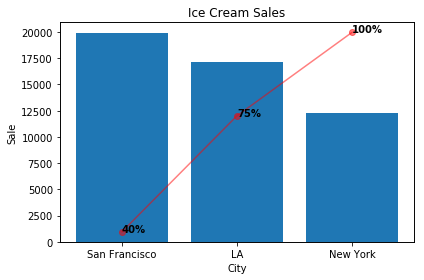

In [53]:
pareto_plot(df, x='City', y='Sale', title='Ice Cream Sales')


From our example, we can see that San Francisco  make up 75% of sales.

Reference : Pareto Plot With Matplotlib
https://tylermarrs.com/posts/pareto-plot-with-matplotlib/
Absolute and Relative frequency in Pandas
https://www.tutorialspoint.com/absolute-and-relative-frequency-in-pandas
    